In [19]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Reading the Netflix dataset from the specified file path
de = pd.read_csv(r"C:\Users\jay\Downloads\netflix_titles.csv")

# Displaying the column names of the dataset
de.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [4]:
# Displaying general information about the dataset (column names, non-null counts, data types)
print("The Info of the Table is : - " , de.info())

# Displaying the statistical summary of numerical columns
print("The Description of the Table is : - " , de.describe())

# Displaying the column names of the dataset
print("The Columns of the Table is : - " , de.columns)

# Displaying the value at the 0th row and 3rd column
print("The 0th row and 3rd value is :",de.iloc[0, 3])

# Displaying the first row of the dataset
print("The 1st row is :", de.iloc[0])

# Displaying the last row of the dataset
print("The last row is :", de.iloc[-1])

# Displaying the data types of all columns
print("The datatypes of columns are:-" , de.dtypes)

# Displaying all the values in the 'show_id' column
print("The data in single columns i.e show_id is:- ", de["show_id"])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB
The Info of the Table is : -  None
The Description of the Table is : -         release_year
count   8807.000000
mean    2014.180198
std        8.819312
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2019.000000
max     2021.000000


In [72]:
#trying to get unique values 
print(de['type'].unique())

#number of unique
print(de['type'].nunique())

#counting how many movies and tv shows 
print(de['type'].value_counts())
print(de['rating'].value_counts())

['Movie' 'TV Show']
2
type
Movie      6131
TV Show    2676
Name: count, dtype: int64
rating
TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
Name: count, dtype: int64


In [77]:
#handling missing/null data 
print(de['director'].isnull())
print("-----")
#count total missing values per column
print(de.isnull().sum())

0       False
1        True
2       False
3        True
4        True
        ...  
8802    False
8803     True
8804    False
8805    False
8806    False
Name: director, Length: 8807, dtype: bool
-----
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [85]:
# Get rows where 'director' is missing
missing_directors = de[de['director'].isnull()]
print(missing_directors)

# Get rows where 'director' is not missing
non_missing = de[de['director'].notnull()]

     show_id     type                                title director  \
1         s2  TV Show                        Blood & Water      NaN   
3         s4  TV Show                Jailbirds New Orleans      NaN   
4         s5  TV Show                         Kota Factory      NaN   
10       s11  TV Show  Vendetta: Truth, Lies and The Mafia      NaN   
14       s15  TV Show      Crime Stories: India Detectives      NaN   
...      ...      ...                                  ...      ...   
8795   s8796  TV Show                      Yu-Gi-Oh! Arc-V      NaN   
8796   s8797  TV Show                           Yunus Emre      NaN   
8797   s8798  TV Show                            Zak Storm      NaN   
8800   s8801  TV Show                   Zindagi Gulzar Hai      NaN   
8803   s8804  TV Show                          Zombie Dumb      NaN   

                                                   cast  \
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   
3                            

In [89]:
# Creating a new column 'new_title' that stores the length of each title in the 'title' column
de['new_title'] = de['title'].apply(len)

# Displaying the first 5 rows of the 'title' column along with the newly created 'new_title' column
print(de[['title','new_title']].head())

                   title  new_title
0   Dick Johnson Is Dead         20
1          Blood & Water         13
2              Ganglands          9
3  Jailbirds New Orleans         21
4           Kota Factory         12


In [94]:
# Simplify 'type' column (replace "Movie" with "M" and "TV Show" with "TV")
de['short'] = de['type'].map({'Movie' : 'M', 'TV Show': 'TV'})
print(de[['type' , 'short']].head())

      type short
0    Movie     M
1  TV Show    TV
2  TV Show    TV
3  TV Show    TV
4  TV Show    TV


In [96]:
#Find unique values in the country column and count how many unique countries are listed.
print(de['country'].nunique())

748


In [100]:
# Counting the occurrences of each unique value in the 'type' column
print(de['type'].value_counts())

type
Movie      6131
TV Show    2676
Name: count, dtype: int64


In [104]:
#Creating a new column 'sorted_list' where 'Movie' is mapped to 'M' using the .map() function  
de['sorted_list'] = de['type'].map({'Movie' : 'M'})

# If a value in 'type' does not match the mapping, it will be set as NaN (missing value)
print(de[['sorted_list' , 'type']].head())

  sorted_list     type
0           M    Movie
1         NaN  TV Show
2         NaN  TV Show
3         NaN  TV Show
4         NaN  TV Show


In [105]:
# Counting the number of missing (null) values in the 'rating' column  
print(de['rating'].isnull().sum())

4


In [113]:
# Creating a new column 'now' that stores the word count of each description
de['now'] = de['description'].apply(lambda y: len(y.split()))

# Displaying the first 5 rows of 'now' and 'description' columns
print(de[['now' , 'description']].head())

   now                                        description
0   27  As her father nears the end of his life, filmm...
1   27  After crossing paths at a party, a Cape Town t...
2   27  To protect his family from a powerful drug lor...
3   24  Feuds, flirtations and toilet talk go down amo...
4   24  In a city of coaching centers known to train I...


In [117]:
# Filtering the dataset to include only shows released after 2023
filter_show = de[de['release_year'] > 2023]
print(filter_show.head())

Empty DataFrame
Columns: [show_id, type, title, director, cast, country, date_added, release_year, rating, duration, listed_in, description, new_title, short, sorted_list, now]
Index: []


In [120]:
# Counting the number of unique countries in the 'country' column
unique = [de['country'].nunique()]
print(unique)

[748]


In [122]:
# Filtering the dataset for movies released after 2015
recent = de[(de['release_year'] > 2015) &  (de['type'] == 'Movie')]
print(recent)

     show_id   type                             title  \
0         s1  Movie              Dick Johnson Is Dead   
6         s7  Movie  My Little Pony: A New Generation   
9        s10  Movie                      The Starling   
12       s13  Movie                      Je Suis Karl   
13       s14  Movie  Confessions of an Invisible Girl   
...      ...    ...                               ...   
8781   s8782  Movie           Yo-Kai Watch: The Movie   
8782   s8783  Movie                       Yoga Hosers   
8786   s8787  Movie                      You Can Tutu   
8787   s8788  Movie         You Can’t Fight Christmas   
8794   s8795  Movie                            اشتباك   

                           director  \
0                   Kirsten Johnson   
6     Robert Cullen, José Luis Ucha   
9                    Theodore Melfi   
12              Christian Schwochow   
13                    Bruno Garotti   
...                             ...   
8781                    Mark Risley   
878

In [131]:
# Creating a new column 'description_word_count' to store the word count of each description
df['description_word_count'] = de['description'].apply(lambda x: len(x.split()))
print(df['description_word_count'].head())

0    27
1    27
2    27
Name: description_word_count, dtype: int64


In [134]:
# Filtering the dataset for TV Shows released after 2018
recent = de[(de['release_year'] > 2018) & (de['type'] == 'TV Shows')]

# Saving the filtered dataset to a CSV file named 'recent.csv' without the index column
recent.to_csv('recent.csv', index = False)

In [136]:
sorted_values = de.sort_values(by = 'release_year')
print(sorted_values)

     show_id     type                               title  \
4250   s4251  TV Show   Pioneers: First Women Filmmakers*   
7790   s7791    Movie                      Prelude to War   
8205   s8206    Movie                The Battle of Midway   
8739   s8740    Movie  Why We Fight: The Battle of Russia   
8763   s8764    Movie     WWII: Report from the Aleutians   
...      ...      ...                                 ...   
3         s4  TV Show               Jailbirds New Orleans   
2         s3  TV Show                           Ganglands   
18       s19    Movie                           Intrusion   
1         s2  TV Show                       Blood & Water   
68       s69    Movie                          Schumacher   

                                               director  \
4250                                                NaN   
7790                                        Frank Capra   
8205                                          John Ford   
8739                        Fra

In [138]:
# Sorting first by 'country' (A-Z) and then by 'release_year' (newest to oldest)
sorted_value = de.sort_values(by = ['country', 'release_year'], ascending=[True, False])
print(sorted_value)

     show_id     type                                      title  \
365     s366    Movie                            Eyes of a Thief   
193     s194  TV Show                                       D.P.   
275     s276  TV Show                                The Kingdom   
838     s839    Movie                      Soy Rada: Serendipity   
434     s435  TV Show                                     Okupas   
...      ...      ...                                        ...   
2484   s2485    Movie                         Lock Your Girls In   
670     s671    Movie  Mobile Suit Gundam II: Soldiers of Sorrow   
689     s690    Movie                       Mobile Suit Gundam I   
7133   s7134    Movie               Jis Desh Men Ganga Behti Hai   
4250   s4251  TV Show          Pioneers: First Women Filmmakers*   

                                  director  \
365                           Najwa Najjar   
193                                    NaN   
275                                    NaN   

In [139]:
# Counting the number of occurrences for each unique value in the 'type' column using groupby
type_counts = de.groupby('type').size
print(type_counts)

<bound method GroupBy.size of <pandas.core.groupby.generic.DataFrameGroupBy object at 0x000002C04880F1D0>>


In [11]:
# Calculating the mean release year for each content type (Movies & TV Shows)
mean_year = de.groupby('type')['release_year'].mean()
print(mean_year)

type
Movie      2013.121514
TV Show    2016.605755
Name: release_year, dtype: float64


In [15]:
de.sort_values(by=["release_year", "director"], ascending=[True, False] ).head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,NaN,NaN,NaN,"December 30, 2018",1925,TV-14,1 Season,TV Shows,This collection restores films from women who ...
8205,s8206,Movie,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",United States,"March 31, 2017",1942,TV-14,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...
7790,s7791,Movie,Prelude to War,Frank Capra,NaN,United States,"March 31, 2017",1942,TV-14,52 min,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...
8763,s8764,Movie,WWII: Report from the Aleutians,John Huston,NaN,United States,"March 31, 2017",1943,TV-PG,45 min,Documentaries,Filmmaker John Huston narrates this Oscar-nomi...
8660,s8661,Movie,Undercover: How to Operate Behind Enemy Lines,John Ford,NaN,United States,"March 31, 2017",1943,TV-PG,61 min,"Classic Movies, Documentaries",This World War II-era training film dramatizes...


In [18]:
# Counting the number of titles released per year
de.groupby('release_year')['release_year'].mean().head()

release_year
1925    1925.0
1942    1942.0
1943    1943.0
1944    1944.0
1945    1945.0
Name: release_year, dtype: float64

In [12]:
# Selecting the first 5 rows of the dataset
de_head = de.head()

# Setting 'release_year' as the index
de_head.set_index('release_year' , inplace = True)
de_head

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
release_year,,,,,,,,,,,
2020,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
2021,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2021,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
2021,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
2021,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [25]:
# Splitting and counting genres
all_genres = de['listed_in'].dropna().str.split(', ').explode()
genre_counts = Counter(all_genres)

# Displaying the top 10 genres
print("Most Common Genres:\n", genre_counts.most_common(10))

Most Common Genres:
 [('International Movies', 2752), ('Dramas', 2427), ('Comedies', 1674), ('International TV Shows', 1351), ('Documentaries', 869), ('Action & Adventure', 859), ('TV Dramas', 763), ('Independent Movies', 756), ('Children & Family Movies', 641), ('Romantic Movies', 616)]


In [9]:
# Counting occurrences of each country
country_counts = de['country'].value_counts().head(10)

# Displaying the top 10 countries with most Netflix content
print("Top 10 Countries with Most Content:\n", country_counts)

Top 10 Countries with Most Content:
 country
United States     2818
India              972
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Egypt              106
Name: count, dtype: int64


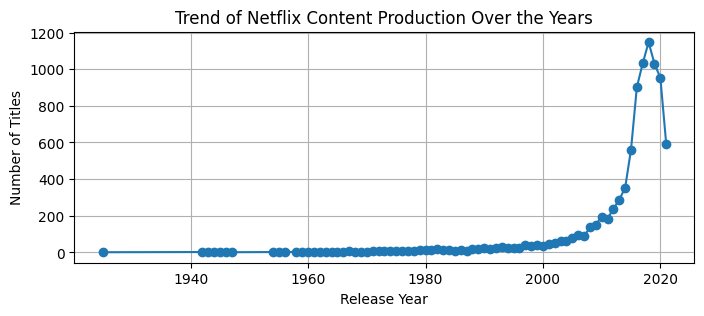

In [27]:
# Counting releases per year
year_counts = de['release_year'].value_counts().sort_index()

# Plotting the trend
plt.figure(figsize=(8, 3))
plt.plot(year_counts.index, year_counts.values, marker='o', linestyle='-')
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.title("Trend of Netflix Content Production Over the Years")
plt.grid(True)
plt.show()

C:\Users\jay\AppData\Local\Temp\ipykernel_3904\582391092.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette="viridis")


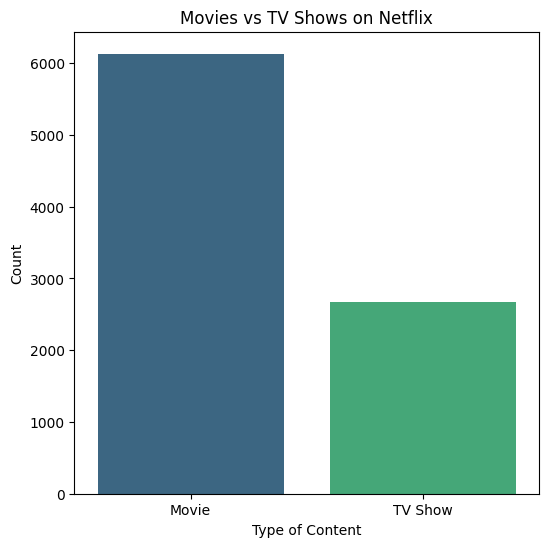

In [20]:
# Counting types (Movies vs TV Shows)
type_counts = de['type'].value_counts()

# Plotting
plt.figure(figsize=(6, 6))
sns.barplot(x=type_counts.index, y=type_counts.values, palette="viridis")
plt.xlabel("Type of Content")
plt.ylabel("Count")
plt.title("Movies vs TV Shows on Netflix")
plt.show()

In [21]:
# Counting occurrences of each director
top_directors = de['director'].dropna().value_counts().head(10)

# Displaying the top 10 directors
print("Top 10 Directors with Most Content:\n", top_directors)

Top 10 Directors with Most Content:
 director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Suhas Kadav               16
Marcus Raboy              16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64


In [28]:
# Creating a new column for description word count
de['description_word_count'] = de['description'].apply(lambda x: len(str(x).split()))

# Displaying the top 5 titles with longest descriptions
print(de[['title', 'description_word_count']].sort_values(by='description_word_count', ascending=False).head())


                        title  description_word_count
4948                    Billu                      48
593                  Snow Day                      44
6221      Balto 2: Wolf Quest                      44
215   Shootout at Lokhandwala                      44
5990                14 Blades                      42


In [23]:
# Splitting and counting actors
all_actors = de['cast'].dropna().str.split(', ').explode()
actor_counts = Counter(all_actors)

# Displaying the top 10 most common actors
print("Most Common Actors on Netflix:\n", actor_counts.most_common(10))

Most Common Actors on Netflix:
 [('Anupam Kher', 43), ('Shah Rukh Khan', 35), ('Julie Tejwani', 33), ('Naseeruddin Shah', 32), ('Takahiro Sakurai', 32), ('Rupa Bhimani', 31), ('Akshay Kumar', 30), ('Om Puri', 30), ('Yuki Kaji', 29), ('Amitabh Bachchan', 28)]


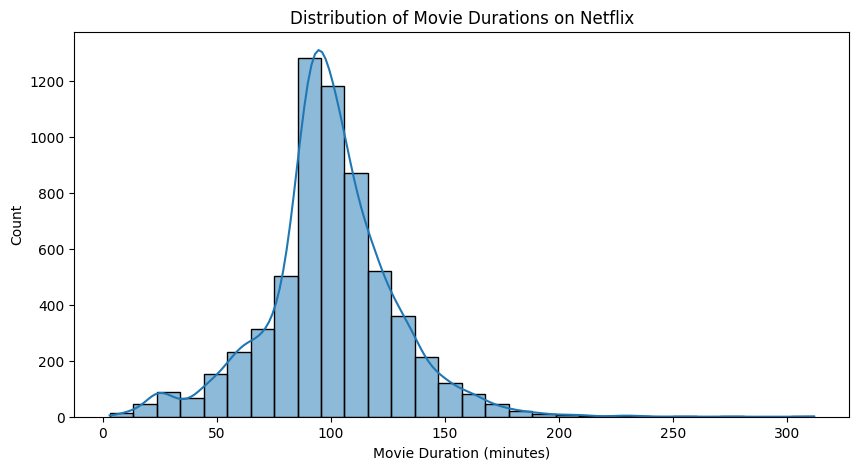

In [24]:
# Filtering only movies and extracting durations
de_movies = de[de['type'] == 'Movie'].dropna(subset=['duration'])
de_movies['duration'] = de_movies['duration'].str.replace(' min', '').astype(int)

# Plotting the distribution of movie durations
plt.figure(figsize=(10, 5))
sns.histplot(de_movies['duration'], bins=30, kde=True)
plt.xlabel("Movie Duration (minutes)")
plt.ylabel("Count")
plt.title("Distribution of Movie Durations on Netflix")
plt.show()